In [39]:
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [49]:
forecast = pd.read_csv("data/test_forecast_long.csv")

forecast = forecast[forecast['ds'] >= '2021-01-09']
forecast["timestamp"] = forecast["ds"]

cutoff_ts = '2021-01-08'

arbitrage_pipeline_benth(forecast,plot_figure=False,print_arbitrage=True)

No forwards data available for date 2021-01-09 00:00:00
Forwards fetched for last available date: 2021-01-08 00:00:00
Arbitrage amount for forward 2021-01-09 00:00:00+01:00 2021-01-10 00:00:00+01:00 : 24.552726438739427
Arbitrage amount for forward 2021-01-10 00:00:00+01:00 2021-01-11 00:00:00+01:00 : 9.560000000000024
Arbitrage amount for forward 2021-01-11 00:00:00+01:00 2021-01-12 00:00:00+01:00 : 3.4700000000000415
Arbitrage amount for forward 2021-01-11 00:00:00+01:00 2021-01-18 00:00:00+01:00 : 0.17312610208628598
Arbitrage amount for forward 2021-01-12 00:00:00+01:00 2021-01-13 00:00:00+01:00 : 3.2399999999998528
Arbitrage amount for forward 2021-01-13 00:00:00+01:00 2021-01-14 00:00:00+01:00 : 7.849999999999341
Arbitrage amount for forward 2021-01-14 00:00:00+01:00 2021-01-15 00:00:00+01:00 : 10.359999999976722
Arbitrage amount for forward 2021-01-16 00:00:00+01:00 2021-01-18 00:00:00+01:00 : 7.699058642685827
Arbitrage amount for forward 2021-01-18 00:00:00+01:00 2021-01-25 00

ds       yhat                 timestamp  corrected
192    2021-01-09 00:00:00  34.361573 2021-01-08 23:00:00+00:00  34.361573
193    2021-01-09 01:00:00  32.245202 2021-01-09 00:00:00+00:00  32.245202
194    2021-01-09 02:00:00  29.806095 2021-01-09 01:00:00+00:00  29.806095
195    2021-01-09 03:00:00  27.973434 2021-01-09 02:00:00+00:00  27.973434
196    2021-01-09 04:00:00  28.328596 2021-01-09 03:00:00+00:00  28.328596
...                    ...        ...                       ...        ...
17515  2022-12-31 19:00:00  53.420872 2022-12-31 18:00:00+00:00  50.457759
17516  2022-12-31 20:00:00  50.855014 2022-12-31 19:00:00+00:00  47.891951
17517  2022-12-31 21:00:00  46.182950 2022-12-31 20:00:00+00:00  43.219936
17518  2022-12-31 22:00:00  41.473853 2022-12-31 21:00:00+00:00  38.510887
17519  2022-12-31 23:00:00  38.098186 2022-12-31 22:00:00+00:00  35.135264

[17328 rows x 4 columns]

In [41]:
# Fetch forwards data for the same date range as the forecast
forwards = filter_independent(get_forwards(
    timestamp=cutoff_ts,
    start=forecast["timestamp"].min(),
    end=forecast["timestamp"].max()
))

forwards

Identifier                  TimeStamp                      Begin  \
0           D  2021-01-08 00:00:00+01:00  2021-01-08 00:00:00+01:00   
1           D  2021-01-08 00:00:00+01:00  2021-01-09 00:00:00+01:00   
2           D  2021-01-08 00:00:00+01:00  2021-01-10 00:00:00+01:00   
3           D  2021-01-08 00:00:00+01:00  2021-01-11 00:00:00+01:00   
4           W  2021-01-08 00:00:00+01:00  2021-01-11 00:00:00+01:00   
5           D  2021-01-08 00:00:00+01:00  2021-01-12 00:00:00+01:00   
6           D  2021-01-08 00:00:00+01:00  2021-01-13 00:00:00+01:00   
7           D  2021-01-08 00:00:00+01:00  2021-01-14 00:00:00+01:00   
8          WE  2021-01-08 00:00:00+01:00  2021-01-16 00:00:00+01:00   
9           W  2021-01-08 00:00:00+01:00  2021-01-18 00:00:00+01:00   
10          W  2021-01-08 00:00:00+01:00  2021-01-25 00:00:00+01:00   
11          W  2021-01-08 00:00:00+01:00  2021-02-01 00:00:00+01:00   
12          M  2021-01-08 00:00:00+01:00  2021-02-01 00:00:00+01:00   
13          M  2021-01-08 00:00:00+01:00  2021-03-01 00:00:00+01:00   
14          M  2021-01-08 00:00:00+01:00  2021-04-01 00:00:00+02:00   
15          M  2021-01-08 00:00:00+01:00  2021-05-01 00:00:00+02:00   
16          M  2021-01-08 00:00:00+01:00  2021-06-01 00:00:00+02:00   
17          M  2021-01-08 00:00:00+01:00  2021-07-01 00:00:00+02:00   
18          M  2021-01-08 00:00:00+01:00  2021-08-01 00:00:00+02:00   
19          M  2021-01-08 00:00:00+01:00  2021-09-01 00:00:00+02:00   
20          M  2021-01-08 00:00:00+01:00  2021-10-01 00:00:00+02:00   
21          Q  2021-01-08 00:00:00+01:00  2021-10-01 00:00:00+02:00   
22          Q  2021-01-08 00:00:00+01:00  2022-01-01 00:00:00+01:00   
23          Q  2021-01-08 00:00:00+01:00  2022-04-01 00:00:00+02:00   
24          Q  2021-01-08 00:00:00+01:00  2022-07-01 00:00:00+02:00   

                          End   Open   High    Low  Close  Settlement  
0   2021-01-09 00:00:00+01:00    NaN    NaN    NaN    NaN       78.34  
1   2021-01-10 00:00:00+01:00  58.75  59.00  58.75  59.00       59.32  
2   2021-01-11 00:00:00+01:00  50.00  50.25  50.00  50.25       49.76  
3   2021-01-12 00:00:00+01:00  54.00  54.00  53.75  53.75       53.23  
4   2021-01-18 00:00:00+01:00  55.00  58.25  55.00  57.00       57.11  
5   2021-01-13 00:00:00+01:00  50.75  50.75  50.75  50.75       49.99  
6   2021-01-14 00:00:00+01:00    NaN    NaN    NaN    NaN       57.84  
7   2021-01-15 00:00:00+01:00    NaN    NaN    NaN    NaN       68.20  
8   2021-01-18 00:00:00+01:00  52.00  52.00  52.00  52.00       52.07  
9   2021-01-25 00:00:00+01:00  54.50  55.50  54.50  55.00       54.72  
10  2021-02-01 00:00:00+01:00    NaN    NaN    NaN    NaN       54.80  
11  2021-02-08 00:00:00+01:00    NaN    NaN    NaN    NaN       55.44  
12  2021-03-01 00:00:00+01:00  54.74  56.15  54.35  55.30       54.38  
13  2021-04-01 00:00:00+02:00  50.00  50.55  49.50  49.50       49.47  
14  2021-05-01 00:00:00+02:00  45.10  45.50  45.10  45.50       45.44  
15  2021-06-01 00:00:00+02:00  43.25  43.25  43.25  43.25       42.98  
16  2021-07-01 00:00:00+02:00    NaN    NaN    NaN    NaN       47.16  
17  2021-08-01 00:00:00+02:00    NaN    NaN    NaN    NaN       47.00  
18  2021-09-01 00:00:00+02:00    NaN    NaN    NaN    NaN       45.00  
19  2021-10-01 00:00:00+02:00    NaN    NaN    NaN    NaN       51.34  
20  2021-11-01 00:00:00+01:00    NaN    NaN    NaN    NaN       49.64  
21  2022-01-01 00:00:00+01:00  52.50  52.50  52.00  52.10       52.01  
22  2022-04-01 00:00:00+02:00  54.50  54.50  54.50  54.50       54.32  
23  2022-07-01 00:00:00+02:00    NaN    NaN    NaN    NaN       46.66  
24  2022-10-01 00:00:00+02:00    NaN    NaN    NaN    NaN       48.80

In [42]:
t, F = partition_forwards(forwards, pd.to_datetime(cutoff_ts, utc=True)-pd.Timedelta(hours=1))

In [43]:
# Construct matrices
H = construct_H(t)

In [44]:
s_t = np.array(forecast["yhat"])
A, b = construct_A_and_b(t, F, s_t)


In [45]:
# Solve the system
x, lam = solve_linear_system(H, A, b)

# Results
print("Solution x:", x)

A@x - b

Solution x: [ 1.89038850e-06  7.30245768e-15 -5.91563835e-14 -6.58669937e-01
  4.48123369e+01 -4.68095893e-06  6.30849354e-04 -2.27105767e-02
 -2.95300709e-01  4.26321215e+01  2.83212181e-06 -8.11662149e-04
  8.11502515e-02 -3.61884721e+00  8.25146796e+01  4.18631375e-06
 -1.20166943e-03  1.23271037e-01 -5.64064493e+00  1.18907038e+02
 -7.06394568e-06  3.11843019e-03 -4.98823308e-01  3.41733932e+01
 -8.36629876e+02 -8.02816975e-07  1.13088415e-04  4.21382122e-02
 -9.10352845e+00  4.61677772e+02  7.33742228e-06 -4.57568939e-03
  1.05491422e+00 -1.06330025e+02  3.96183165e+03 -4.07901347e-06
  3.09615543e-03 -8.78390677e-01  1.10200123e+02 -5.13243458e+03
  1.95271867e-07 -1.86495711e-04  6.70128524e-02 -1.08115285e+01
  6.76124707e+02 -2.90921003e-09  3.75812252e-06 -1.47852783e-03
  1.47092310e-01  1.86074573e+01  1.32311768e-09 -3.14903630e-06
  2.74865337e-03 -1.00270098e+00  1.35886373e+02  2.71088357e-10
 -7.25160749e-07  6.54424895e-04 -1.98517241e-01  2.00839146e+01
 -3.83002102e

array([ 7.10542736e-15, -2.84217094e-14, -2.27373675e-13,  0.00000000e+00,
       -1.81898940e-12,  0.00000000e+00, -1.81898940e-12, -7.27595761e-12,
        4.54747351e-12,  0.00000000e+00,  0.00000000e+00, -2.84217094e-14,
        1.13686838e-13,  0.00000000e+00,  0.00000000e+00, -9.09494702e-13,
        3.63797881e-12, -7.27595761e-12, -3.63797881e-12,  7.27595761e-12,
        0.00000000e+00,  9.09494702e-13, -1.81898940e-12,  1.81898940e-12,
        1.55431223e-15, -1.46549439e-13,  5.68434189e-14, -2.84217094e-14,
       -5.96855898e-13,  3.97903932e-13,  4.40536496e-13, -9.09494702e-13,
        1.77635684e-13,  1.33226763e-15, -8.88178420e-16, -4.10782519e-15,
        1.33226763e-15,  2.22044605e-16,  1.90958360e-14, -6.66133815e-16,
        8.88178420e-15, -8.88178420e-15,  2.66453526e-14,  1.59872116e-14,
        0.00000000e+00,  8.88178420e-16,  4.44089210e-16,  1.33226763e-15,
        6.38378239e-16,  9.52848911e-14,  3.00870440e-14,  8.88178420e-14,
       -8.88178420e-16,  

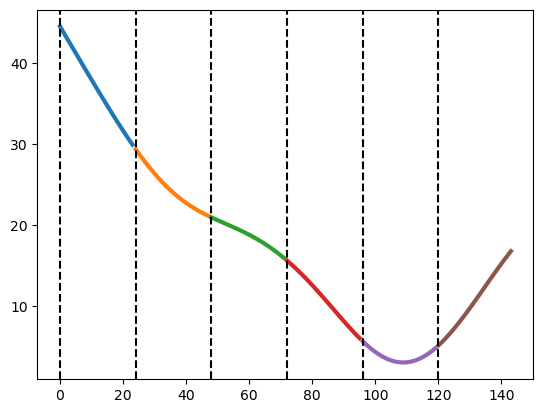

In [46]:
#print correction term epsilon
for k in range(len(t)-20):
    plt.plot(range(t[k],t[k+1],1),[epsilon(x,t,i) for i in range(t[k],t[k+1],1)],lw=3)
    #plot dotted vertical lines at t[k]
    plt.axvline(x=t[k], color='k', linestyle='--')

In [47]:
epsilon_values = [epsilon(x, t, i) for i, _ in enumerate(forecast["yhat"])]
print("epsilon values:", epsilon_values)
initial_yhat = forecast["yhat"]
forecast["corrected"] = forecast["yhat"] + epsilon_values

fig = plot_forecast_forwards("2021-01-04", forecast, forwards)

# Add intial as a dashed red line
fig.add_trace(go.Scatter(
    x=forecast["timestamp"],
    y=forecast["corrected"],
    mode='lines',
    name='PFC',
    line=dict(color='red')
))

# Add the correction area as a transparent red fill
fig.add_trace(go.Scatter(
    x=pd.concat([forecast["timestamp"], forecast["timestamp"][::-1]]),
    y=pd.concat([initial_yhat, forecast["corrected"][::-1]]),
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.2)',  # Transparent red
    line=dict(color='rgba(255, 0, 0, 0)'),
    name='arbitrage correction \u03b5(t)'
))


epsilon values: [44.483002308953004, 43.82434371477623, 43.16574183225455, 42.50728740003624, 41.84911652609371, 41.191410687723476, 40.53439673154616, 39.87834687350652, 39.22357869887344, 38.5704551622399, 37.91938458752301, 37.270820667963996, 36.625262466128206, 35.983254413905094, 35.34538631250825, 34.712293332475376, 34.08465601366828, 33.4632002652729, 32.8486973657993, 32.24196396308165, 31.643862074278232, 31.055299085871464, 30.47722775366787, 29.910646202798095, 29.356596613447415, 28.816131049849155, 28.290224718498465, 27.779741797145626, 27.28543412052651, 26.807941180362633, 26.34779012536111, 25.905395761214685, 25.48106055060172, 25.074974613186168, 24.68721572561764, 24.317749321531323, 23.96642849154805, 23.632993983274275, 23.317074201302034, 23.018185207209005, 22.735730719558493, 22.4690021138994, 22.21717842276624, 21.97932633567916, 21.754400199143927, 21.54124201665192, 21.33858144868012, 21.14503581269114, 20.95911158574941, 20.77924347254107, 20.603893578039

In [48]:
check_arbitragefree(forecast,forwards,verbose=True)


Arbitrage amount for forward 2021-01-08 00:00:00+01:00 2021-01-09 00:00:00+01:00 : 0.0
Arbitrage amount for forward 2021-01-09 00:00:00+01:00 2021-01-10 00:00:00+01:00 : 0.0
Arbitrage amount for forward 2021-01-10 00:00:00+01:00 2021-01-11 00:00:00+01:00 : 7.105427357601002e-15
Arbitrage amount for forward 2021-01-11 00:00:00+01:00 2021-01-12 00:00:00+01:00 : 0.0
Arbitrage amount for forward 2021-01-11 00:00:00+01:00 2021-01-18 00:00:00+01:00 : 9.734435479913373e-13
Arbitrage amount for forward 2021-01-12 00:00:00+01:00 2021-01-13 00:00:00+01:00 : 1.2789769243681803e-13
Arbitrage amount for forward 2021-01-13 00:00:00+01:00 2021-01-14 00:00:00+01:00 : 2.842170943040401e-14
Arbitrage amount for forward 2021-01-14 00:00:00+01:00 2021-01-15 00:00:00+01:00 : 1.1226575225009583e-12
Arbitrage amount for forward 2021-01-16 00:00:00+01:00 2021-01-18 00:00:00+01:00 : 1.4210854715202004e-14
Arbitrage amount for forward 2021-01-18 00:00:00+01:00 2021-01-25 00:00:00+01:00 : 1.4210854715202004e-14


True